In [240]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [242]:
f = open("Sahil Chat 24hrs.txt","r",encoding = "utf-8")

In [244]:
data = f.read()

In [246]:
pattern = '(\d{2}/\d{2}/\d{2}), (\d{2}:\d{2}:\d{2}) - ([^:]+): (.+)'



<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/var/folders/vr/k31rtn_168v7kvg7k8xq_v540000gn/T/ipykernel_5424/1218366891.py:1: SyntaxWarning: invalid escape sequence '\d'
  pattern = '(\d{2}/\d{2}/\d{2}), (\d{2}:\d{2}:\d{2}) - ([^:]+): (.+)'


In [250]:
def convert_whatsapp_format(data):
    # Regular expression to match the original format
    pattern = r"\[(\d{1,2}/\d{1,2}/\d{2,4}, \d{1,2}:\d{2}:\d{2})\] ([^:]+): (.+)"
    
    # Replace with the new format
    converted_text = re.sub(pattern, r"\1 - \2: \3", data)
    
    return converted_text

converted_text = convert_whatsapp_format(data)


In [254]:
import re

# Replace with the actual large text
data = converted_text

# Regex pattern to extract date, time, sender, and message
pattern = r"(\d{1,2}/\d{1,2}/\d{2,4}),\s(\d{1,2}:\d{2}:\d{2})\s-\s([^:]+):\s(.*)"

# Initialize lists
date_time_list = []
sender_message_list = []

# Process the large text line by line
for line in text.split('\n'):
    # Apply regex only on non-empty lines
    if line.strip():
        matches = re.findall(pattern, line)
        if matches:
            # Extract and store date-time and sender-message pairs
            for match in matches:
                date_time_list.append(f"{match[0]}, {match[1]}")
                sender_message_list.append(f"{match[2]}: {match[3]}")



In [257]:
df = pd.DataFrame({"User Messages":sender_message_list,"Messages_date":date_time_list})
df["Messages_date"] = pd.to_datetime(df["Messages_date"], format="%d/%m/%y, %H:%M:%S")
df.rename(columns = {"Messages_date":"date"},inplace = True)
df

,User Messages,date
0,Sahil Rathod : ‎Messages and calls are end-to...,2021-12-08 12:08:53
1,Soham: Nahi re Main Soham Khopkar hu,2021-12-08 12:21:12
2,Sahil Rathod : Ok,2021-12-08 12:22:19
3,Sahil Rathod : Bol,2021-12-08 15:11:21
4,Sahil Rathod : Call kyu kiya tha,2021-12-08 15:11:27
...,...,...
32000,Soham: Kyu?,2023-09-29 15:37:13
32001,Sahil Rathod : vpn samjh re,2023-09-29 15:37:20
32002,Soham: Badhiya💦✊🏻,2023-09-29 15:37:28
32003,Soham: Happy Birthday Bhai🥳,2024-01-25 20:01:49


In [259]:
df.shape

(32005, 2)

In [261]:
df['Username'] = df['User Messages'].str.extract(r"([^:]+):")  # Extracts everything before the colon

# Create a new column 'Message' to extract the message
df['Message'] = df['User Messages'].str.extract(r":\s*(.*)")  # Extracts everything after the colon

# Print the DataFrame to verify the new columns
print(df[['Username', 'Message']].head())

         Username                                            Message
0  Sahil  Rathod   ‎Messages and calls are end-to-end encrypted. ...
1           Soham                      Nahi re Main Soham Khopkar hu
2  Sahil  Rathod                                                  Ok
3  Sahil  Rathod                                                 Bol
4  Sahil  Rathod                                   Call kyu kiya tha


In [263]:
df.head()

,User Messages,date,Username,Message
0,Sahil Rathod : ‎Messages and calls are end-to...,2021-12-08 12:08:53,Sahil Rathod,‎Messages and calls are end-to-end encrypted. ...
1,Soham: Nahi re Main Soham Khopkar hu,2021-12-08 12:21:12,Soham,Nahi re Main Soham Khopkar hu
2,Sahil Rathod : Ok,2021-12-08 12:22:19,Sahil Rathod,Ok
3,Sahil Rathod : Bol,2021-12-08 15:11:21,Sahil Rathod,Bol
4,Sahil Rathod : Call kyu kiya tha,2021-12-08 15:11:27,Sahil Rathod,Call kyu kiya tha


In [265]:
df = df[["date","Username","Message"]]

In [267]:
df.head()

,date,Username,Message
0,2021-12-08 12:08:53,Sahil Rathod,‎Messages and calls are end-to-end encrypted. ...
1,2021-12-08 12:21:12,Soham,Nahi re Main Soham Khopkar hu
2,2021-12-08 12:22:19,Sahil Rathod,Ok
3,2021-12-08 15:11:21,Sahil Rathod,Bol
4,2021-12-08 15:11:27,Sahil Rathod,Call kyu kiya tha


<Axes: ylabel='count'>

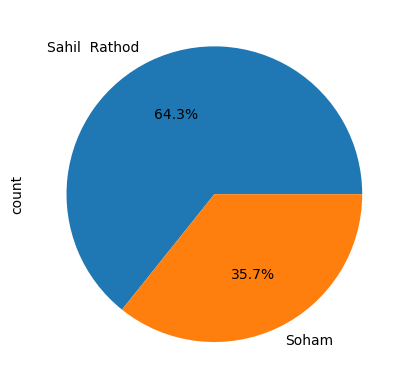

In [269]:
df["Username"].value_counts().plot(kind = "pie",autopct='%1.1f%%')

In [271]:
df["year"] = df["date"].dt.year

In [273]:
df["month"] = df["date"].dt.month

In [275]:
df["day"] = df["date"].dt.day

In [277]:
df["hour"] = df["date"].dt.hour

In [279]:
df["minute"] = df["date"].dt.minute

In [281]:
df.head()

,date,Username,Message,year,month,day,hour,minute
0,2021-12-08 12:08:53,Sahil Rathod,‎Messages and calls are end-to-end encrypted. ...,2021,12,8,12,8
1,2021-12-08 12:21:12,Soham,Nahi re Main Soham Khopkar hu,2021,12,8,12,21
2,2021-12-08 12:22:19,Sahil Rathod,Ok,2021,12,8,12,22
3,2021-12-08 15:11:21,Sahil Rathod,Bol,2021,12,8,15,11
4,2021-12-08 15:11:27,Sahil Rathod,Call kyu kiya tha,2021,12,8,15,11


<Axes: xlabel='year'>

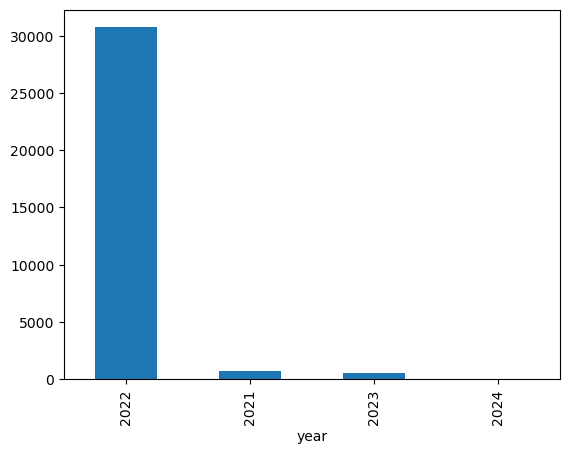

In [283]:
df["year"].value_counts().plot(kind = "bar")

In [288]:
 new_df = df[df["Username"] == "Soham"].shape[0]

In [290]:
new_df

11438

In [312]:
num_media_messages = df[df["Message"].str.contains("image omitted|video omitted", na=False)].shape[0]

In [316]:
media_df

77

In [318]:
doc_messages = df[df["Message"].str.contains("document omitted", na=False)].shape[0]

In [320]:
doc_messages

3

In [344]:
df = round(df["Username"].value_counts()/df.shape[0]*100,2).reset_index().rename(columns = {"count":"Percent","Username":"Name"})

,Name,Percent
0,Sahil Rathod,64.26
1,Soham,35.74
